# Quotations Behind Brexit

Brexit (a portmanteau of "British exit") was the withdrawal of the United Kingdom (UK) from the European Union (EU) at 23:00 GMT on 31 January 2020 (00:00 CET). The UK is the first and so far the only member state to have left the EU, after 47 years of having been a part of the union — the EU and its predecessor the European Communities (EC), which included the European Economic Community — since 1 January 1973.
Actually, the United Kindom was considering about exiting the EU ever since 2016. After several referendums and negotiations between UK-EU, they finally exit the EU in early January, 2020. And the withdrawl aggrement finally came into force on 31 January 2020.
In our project, we would like to dive into quotations talking about the Brexit and analyze information behind these quotations to learn about people's attitude through the whole event.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./brexit_enriched_age.csv.bz2', compression='bz2', sep=',',index_col=0)
brexit_enriched = pd.read_json('brexit_enriched_age.json.bz2', compression='bz2')
df.head()

,date,quotation,speaker,qids,probas,speaker_qid,date_of_birth,nationality,gender,occupation,label,age
0,2016-09-07,Corbyn shows his true colours. Rather than att...,Tim Farron,['Q304251'],"[['Tim Farron', '0.8865'], ['None', '0.0683'],...",Q304251,+1970-05-27T00:00:00Z,['United Kingdom'],['male'],['politician'],Tim Farron,51.0
1,2016-08-11,People are nervous and universities are being ...,Steve Smith,"['Q11894442', 'Q16885757', 'Q23418614', 'Q2347...","[['Steve Smith', '0.887'], ['None', '0.113']]",Q11894442,+1981-07-28T00:00:00Z,['United States of America'],['male'],['basketball player'],Steve Smith,40.0
2,2016-07-05,best placed to help forge a great post Brexit ...,Boris Johnson,['Q180589'],"[['Boris Johnson', '0.7713'], ['Andrea Leadsom...",Q180589,+1964-06-19T00:00:00Z,"['United States of America', 'United Kingdom']",['male'],"['journalist', 'politician', 'editor', 'writer...",Boris Johnson,57.0
3,2016-12-14,In the run-up to the Brexit vote earlier this ...,Janet Yellen,['Q263725'],"[['Janet Yellen', '0.6759'], ['None', '0.3241']]",Q263725,+1946-08-13T00:00:00Z,['United States of America'],['female'],"['economist', 'professor', 'banker', 'politici...",Janet Yellen,75.0
4,2016-07-25,"On the issue of Brexit, I speak for the people...",Martin McGuinness,['Q57689'],"[['Martin McGuinness', '0.924'], ['None', '0.0...",Q57689,+1950-05-23T00:00:00Z,['Ireland'],['male'],['politician'],Martin McGuinness,71.0


In [4]:
# derive the speakers with the maximum probability
speaker_max_prob = df['probas'].apply(lambda x: x[1:-1].split(',')[0])

# get rid of redundant symbols in strings
speaker_max_prob = speaker_max_prob.apply(lambda x: x.strip('[').replace('\'',''))

# filter out the rows where the speaker assigned is diiferent from the speaker with the maximum probability
df = df[df['speaker'] == speaker_max_prob]

# filter out the rows where the probability of the asignned speaker is lower than 0.5
prob = df['probas'].apply(lambda x: x[1:-1].split(',')).apply(lambda x: x[1].strip(']').replace('\'',''))
df = df[prob.astype(float) > 0.5]

df

,date,quotation,speaker,qids,probas,speaker_qid,date_of_birth,nationality,gender,occupation,label,age
0,2016-09-07,Corbyn shows his true colours. Rather than att...,Tim Farron,['Q304251'],"[['Tim Farron', '0.8865'], ['None', '0.0683'],...",Q304251,+1970-05-27T00:00:00Z,['United Kingdom'],['male'],['politician'],Tim Farron,51.0
1,2016-08-11,People are nervous and universities are being ...,Steve Smith,"['Q11894442', 'Q16885757', 'Q23418614', 'Q2347...","[['Steve Smith', '0.887'], ['None', '0.113']]",Q11894442,+1981-07-28T00:00:00Z,['United States of America'],['male'],['basketball player'],Steve Smith,40.0
2,2016-07-05,best placed to help forge a great post Brexit ...,Boris Johnson,['Q180589'],"[['Boris Johnson', '0.7713'], ['Andrea Leadsom...",Q180589,+1964-06-19T00:00:00Z,"['United States of America', 'United Kingdom']",['male'],"['journalist', 'politician', 'editor', 'writer...",Boris Johnson,57.0
3,2016-12-14,In the run-up to the Brexit vote earlier this ...,Janet Yellen,['Q263725'],"[['Janet Yellen', '0.6759'], ['None', '0.3241']]",Q263725,+1946-08-13T00:00:00Z,['United States of America'],['female'],"['economist', 'professor', 'banker', 'politici...",Janet Yellen,75.0
4,2016-07-25,"On the issue of Brexit, I speak for the people...",Martin McGuinness,['Q57689'],"[['Martin McGuinness', '0.924'], ['None', '0.0...",Q57689,+1950-05-23T00:00:00Z,['Ireland'],['male'],['politician'],Martin McGuinness,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95803,2020-03-02,"If the UK were to abide by EU rules, that woul...",David Frost,"['Q1174477', 'Q380865', 'Q5233878', 'Q5233879'...","[['David Frost', '0.761'], ['None', '0.2171'],...",Q1174477,+1959-09-11T00:00:00Z,['South Africa'],['male'],['golfer'],David Frost,62.0
95804,2020-01-24,It is universally agreed that one thing that s...,Bishop Paul,['Q18510098'],"[['Bishop Paul', '0.8251'], ['None', '0.1749']]",Q18510098,+1953-04-06T00:00:00Z,['United States of America'],['male'],['priest'],Bishop Paul,68.0
95805,2020-02-03,Sometimes I feel I am Scottish. I am very Scot...,Donald Tusk,['Q946'],"[['Donald Tusk', '0.54'], ['None', '0.3808'], ...",Q946,+1957-04-22T00:00:00Z,['Poland'],['male'],"['politician', 'historian']",Donald Tusk,64.0
95806,2020-01-30,"he needs to listen to pro-Europeans, and I thi...",Ed Davey,['Q296689'],"[['Ed Davey', '0.6614'], ['None', '0.1591'], [...",Q296689,+1965-12-25T00:00:00Z,['United Kingdom'],['male'],"['politician', 'economist']",Ed Davey,56.0


In [5]:
df_speaker = df.groupby(['speaker_qid']).agg({'speaker_qid': ['count']}).sort_values(by=('speaker_qid', 'count'), ascending=False)
df_speaker = df_speaker[:20].reset_index()
df_speaker

speaker_qid      
               count
0      Q264766  3285
1      Q180589  2795
2      Q318471  1820
3      Q291169  1528
4      Q467112  1379
5         Q946   992
6     Q1728820   803
7      Q244312   660
8     Q1670096   640
9      Q438465   628
10     Q333533   606
11       Q9545   605
12     Q192533   573
13     Q574980   538
14    Q6383803   495
15   Q18388174   481
16     Q327790   457
17    Q1174175   404
18   Q18921442   394
19     Q304251   380

In [6]:
df_speaker['Speaker']=['Theresa May','Boris Johnson','Nigel Farage','Jeremy Corbyn','Nicola Sturgeon',
                       'Donald Tusk','Leo Varadkar','Vince Cable','Simon Coveney','Michel Barnier',
                       'Jeremy Hunt','Tony Blair','Mark Carney','Jacob Rees-Mogg','Keir Starmer',
                       'Philip Hammond','Jo Swinson','David Davis','Ian Blackford','Tim Farron']

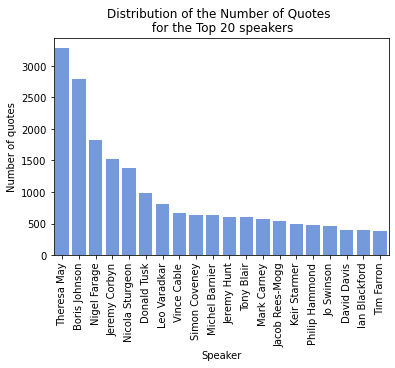

In [7]:
ax = sns.barplot(data = df_speaker, x = 'Speaker', y=('speaker_qid', 'count'),  color='cornflowerblue',alpha=1)
ax.set_xticklabels(df_speaker['Speaker'], rotation=90)
ax.set_title('Distribution of the Number of Quotes \n for the Top 20 speakers')
plt.ylabel('Number of quotes')
plt.show()

### Where these Quotations come from ?
Let's first have a look at where these quotations come frm by analyzing the nationalities of different speakers on the Brexit.

In [13]:
Nations = brexit_enriched['nationality'].explode().value_counts()
Top20_Nations = Nations[:20]
Top20_Nations.head()

United Kingdom              53891
United States of America    11653
Ireland                      6898
Australia                    2648
Canada                       2342
Name: nationality, dtype: int64

In [14]:
type(Top20_Nations)

pandas.core.series.Series

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


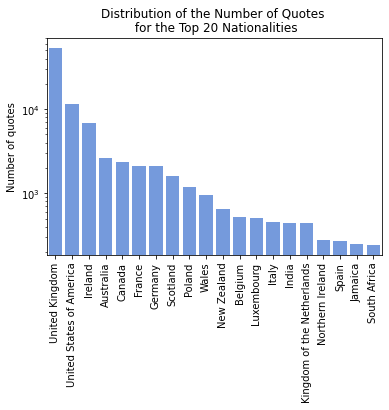

In [19]:
ax = sns.barplot(Top20_Nations.index, Top20_Nations.values,color='cornflowerblue',alpha=1)
ax.set_xticklabels(Top20_Nations.index, rotation=90)
ax.set_yscale("log")
ax.set_title('Distribution of the Number of Quotes \n for the Top 20 Nationalities')
plt.ylabel('Number of quotes')
plt.show()

After visualizing the top 20 nations talking about the Brexit, it's obvious that most of speakers talking about the Brexit came from dominant countries in the world, for example, the United Kindom, the United States of America, Australia and so on. As this event, Brexit, was mostly about the European situation, we can observe that most countries in the top 20 nations talking about the Brexit were from the Europe, which shows that people care about the Brexit are mostly from the Europe.

### Gender of Speakers about the Brexit

In [20]:
Gender = brexit_enriched['gender'].explode().value_counts()
Gender.head()

male                75881
female              19200
eunuch                 31
cisgender female       26
non-binary             14
Name: gender, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


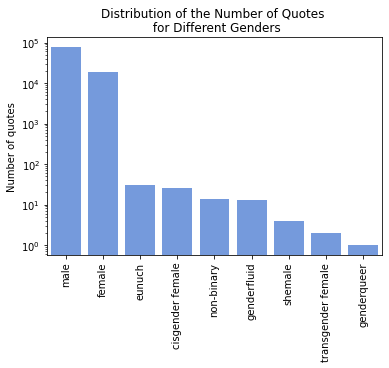

In [24]:
ax = sns.barplot(Gender.index, Gender.values,color='cornflowerblue',alpha=1)
ax.set_xticklabels(Gender.index, rotation=90)
ax.set_yscale("log")
ax.set_title('Distribution of the Number of Quotes \n for Different Genders')
plt.ylabel('Number of quotes')
plt.show()

### Speakers' occupation behind Brexit-related quotations

In [23]:
Occupations = brexit_enriched['occupation'].explode().value_counts()
Top20_Occupations = Occupations[:20]
Top20_Occupations.head()

politician    54383
journalist     9374
writer         8021
lawyer         6583
economist      4894
Name: occupation, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


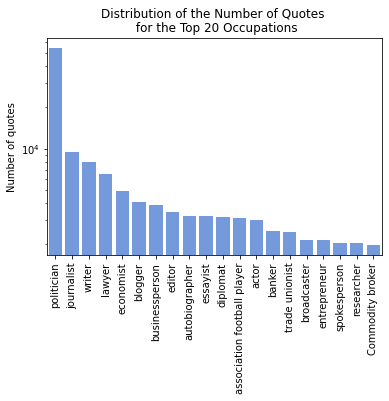

In [25]:
ax = sns.barplot(Top20_Occupations.index, Top20_Occupations.values,color='cornflowerblue',alpha=1)
ax.set_xticklabels(Top20_Occupations.index, rotation=90)
ax.set_yscale("log")
ax.set_title('Distribution of the Number of Quotes \n for the Top 20 Occupations')
plt.ylabel('Number of quotes')
plt.show()